In [20]:
from __future__ import print_function
import os, sys
from PIL import Image
import pandas as pd
import numpy as np
import PIL
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# new processing, Nov 27, 2019


In [9]:
left, up = 172, 158
width, height = 1718, 300
box = (left, up, left+width, up+height)

In [10]:
def crop_img(f, box):
    im = Image.open(f)
    splt = f.split('/')
    of = '/'.join(splt[:-1] + ['proc'] + [splt[-1]])
    im.crop(box).resize((800, 200), resample=PIL.Image.BILINEAR).save(of)
#     return pim

In [ ]:
path = '/projects/da_workspace/szspace/data/giab_imgs/positives'

In [438]:
path = '/projects/da_workspace/szspace/data/giab_imgs/negatives'

In [442]:
path = '/projects/da_workspace/szspace/data/giab_imgs/pog_imgs/positives'

In [446]:
path = '/projects/da_workspace/szspace/data/giab_imgs/pog_imgs/negatives'

In [449]:
path = '/projects/da_workspace/szspace/data/pog664_posorg'

In [454]:
path = '/projects/da_workspace/szspace/data/pog664_negorg'

In [459]:
proc_path = f'{path}/proc'
if not os.path.exists(proc_path):
    os.makedirs(proc_path)
path = Path(path)
path
# this gives a list of all image files in a directory
img_files = [i for i in path.ls() if str(i).endswith('png')] 

img_files[:2]

PosixPath('/projects/da_workspace/szspace/data/pog664_negorg')

[PosixPath('/projects/da_workspace/szspace/data/pog664_negorg/chr1_8,384,481_8,384,781.png'),
 PosixPath('/projects/da_workspace/szspace/data/pog664_negorg/chr1_26,608,747_26,609,047.png')]

In [460]:
for f in img_files:
    pim = crop_img(str(f), box)
np.array(pim).shape

()

# this is to cropping images for training

(1200, 1920, 4)

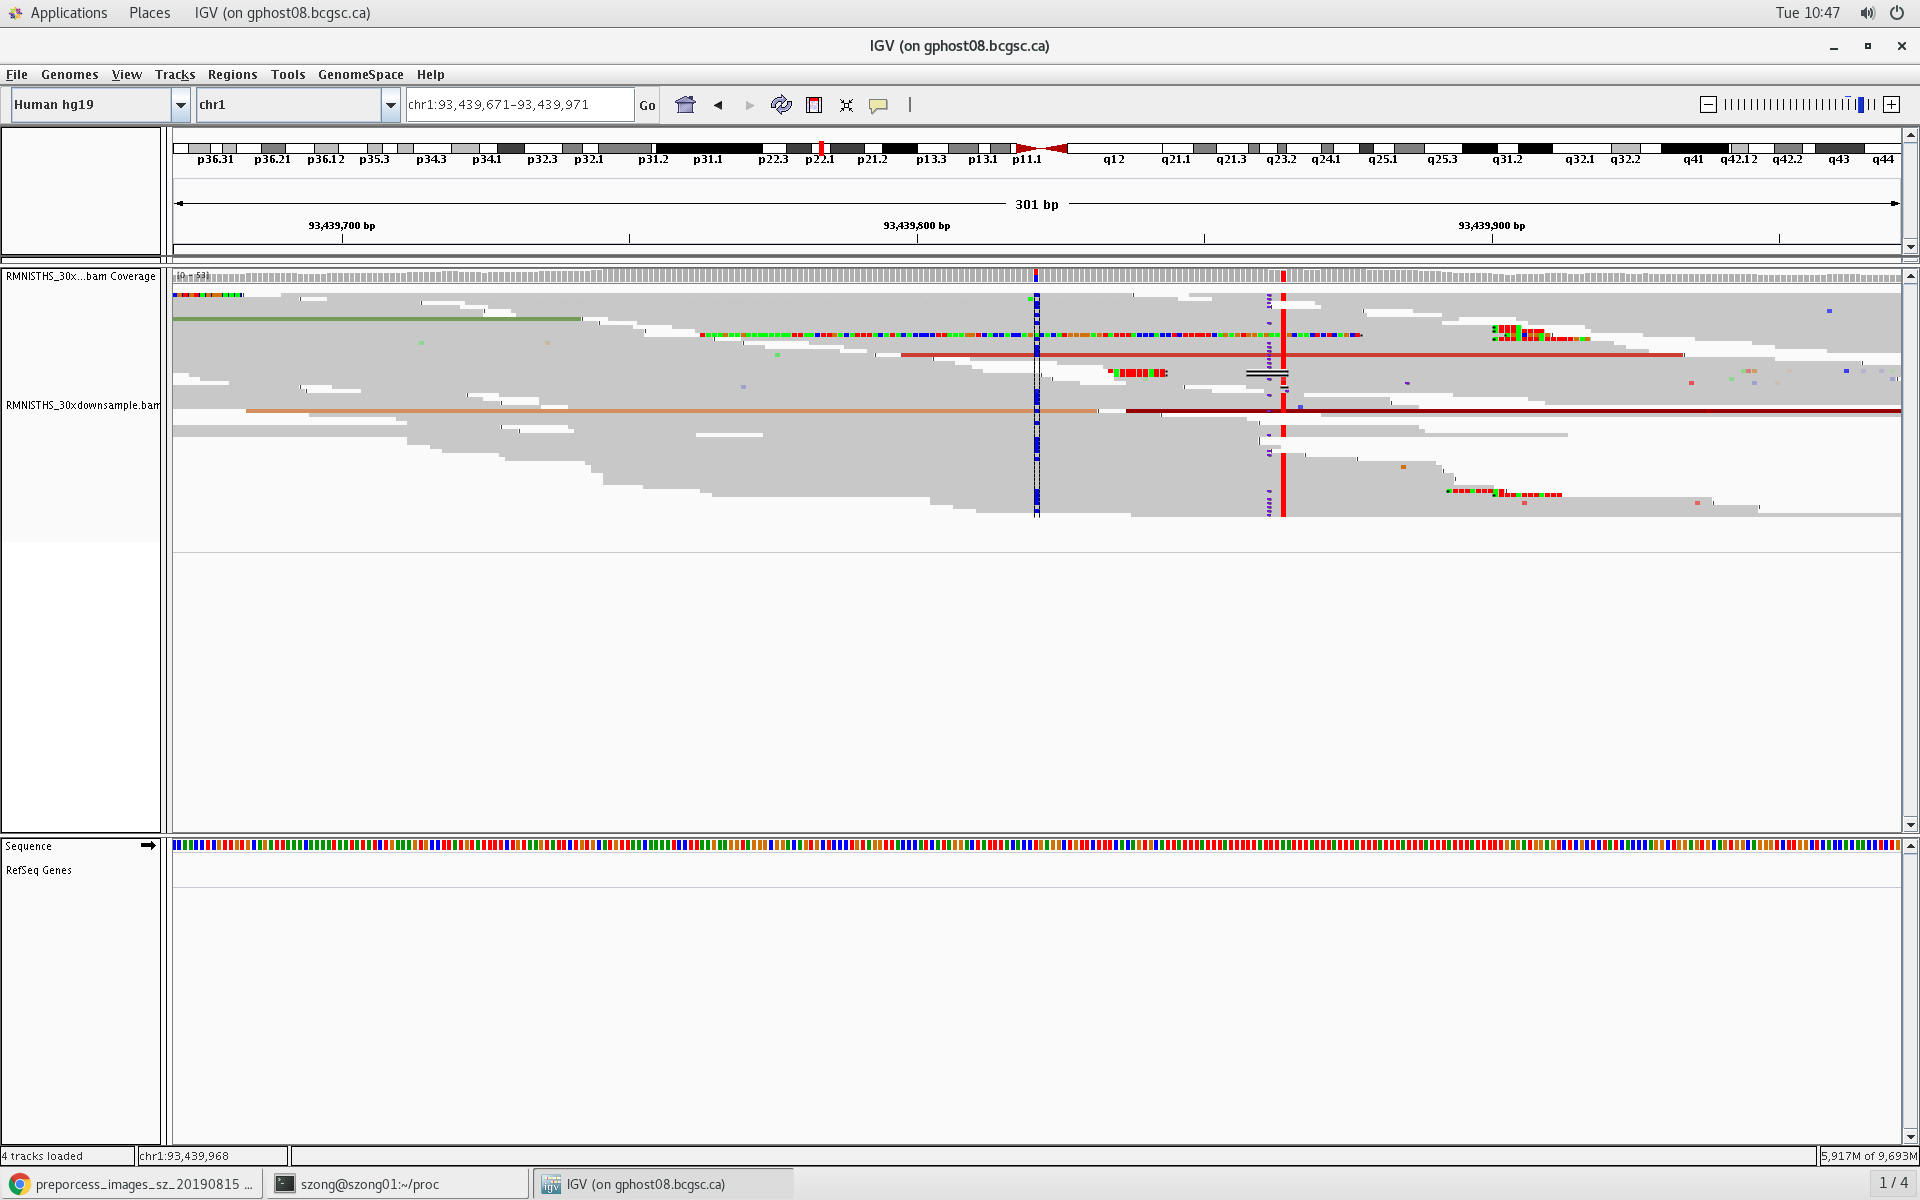

In [339]:
f = '/projects/da_workspace/szspace/data/giab/original_images/pos2_original/chrX_118,174,498_118,174,798.png'
f = '/home/szong/test_screenshot.png'
f = '/home/szong/screenshot.png'
# f = '/projects/da_workspace/szspace/data/giab/images/chr1_93,439,671_93,439,971.png'
np.array(Image.open(f)).shape
Image.open(f)

In [313]:
f = '/projects/da_workspace/szspace/data/giab/images/all.img.txt'
f = '/projects/da_workspace/szspace/data/giab/images/neg1_original/neg1.txt'
f = '/projects/da_workspace/szspace/data/giab/images/pos2_original/pos2.txt'
f = '/projects/da_workspace/szspace/data/giab/original_images/neg2_original/neg2.txt'
imgs = pd.read_csv(f, sep='\t', header=None)[0].tolist()
imgs[:2]

['/projects/da_workspace/szspace/data/giab/images/neg2_original/chr10_101,045,950_101,046,250.png',
 '/projects/da_workspace/szspace/data/giab/images/neg2_original/chr10_10,340,285_10,340,585.png']

In [327]:
cim = crop_img(f)
np.array(cim).shape


(500, 548, 4)

In [314]:
for i in imgs:
    crop_img(i)

FileNotFoundError: [Errno 2] No such file or directory: '/projects/da_workspace/szspace/data/giab/images/neg2_original/chr10_101,045,950_101,046,250.png'

it appears each read takes up 4 pixels vertically.

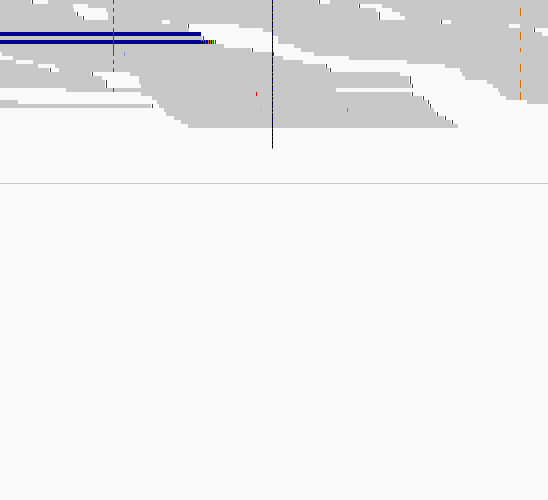

(500, 548, 3)

In [157]:
cimg = crop_img(imgs[0])
cimg
np.array(cimg).shape

# reserve test dataset

In [176]:
f = '/projects/da_workspace/szspace/data/giab/images/train/ps.fn.txt'
fns = pd.read_csv(f, sep='\t', header=None)[0]

f1 = '/projects/da_workspace/szspace/data/giab/images/train/ps.fn.totest.txt'
np.savetxt(f1, np.random.choice(fns, size=1200, replace=False), fmt='%s')

In [177]:
f = '/projects/da_workspace/szspace/data/giab/images/train/ns.fn.txt'
fns = pd.read_csv(f, sep='\t', header=None)[0]

f1 = '/projects/da_workspace/szspace/data/giab/images/train/ns.fn.totest.txt'
np.savetxt(f1, np.random.choice(fns, size=1200, replace=False), fmt='%s')

In [166]:
fns

0       /projects/da_workspace/szspace/data/giab/image...
1       /projects/da_workspace/szspace/data/giab/image...
2       /projects/da_workspace/szspace/data/giab/image...
3       /projects/da_workspace/szspace/data/giab/image...
4       /projects/da_workspace/szspace/data/giab/image...
5       /projects/da_workspace/szspace/data/giab/image...
6       /projects/da_workspace/szspace/data/giab/image...
7       /projects/da_workspace/szspace/data/giab/image...
8       /projects/da_workspace/szspace/data/giab/image...
9       /projects/da_workspace/szspace/data/giab/image...
10      /projects/da_workspace/szspace/data/giab/image...
11      /projects/da_workspace/szspace/data/giab/image...
12      /projects/da_workspace/szspace/data/giab/image...
13      /projects/da_workspace/szspace/data/giab/image...
14      /projects/da_workspace/szspace/data/giab/image...
15      /projects/da_workspace/szspace/data/giab/image...
16      /projects/da_workspace/szspace/data/giab/image...
17      /proje

# below for plotted images

In [137]:
f = '/projects/da_workspace/szspace/data/giab/images/all.img.txt'
f = '/projects/da_workspace/szspace/data/giab/images/neg1_original/neg1.txt'
imgs = pd.read_csv(f, sep='\t', header=None)[0].tolist()
imgs[:2]

['/projects/da_workspace/szspace/data/giab/images/neg1_original/chr10_103,185,309_103,185,609.png',
 '/projects/da_workspace/szspace/data/giab/images/neg1_original/chr10_103,458,345_103,458,645.png']

In [94]:
for img in imgs[:2]:
    crop_custom_img(img)

(70, 70, 570, 570)
(70, 70, 570, 570)


In [62]:
f = '/projects/da_workspace/szspace/data/giab/images/chr5_33,654,823_33,655,123.png'
crop_img(f)

In [13]:
! ls /projects/da_workspace/szspace/data/giab/image2/giab.4.171134361.png


/projects/da_workspace/szspace/data/giab/image2/giab.4.171134361.png


In [91]:
def crop_custom_img(inf):
    im = Image.open(inf)
    left, upper = 70, 70
    w, h = 500, 500
    box = (left, upper, left+w, upper+h)
    print(box)
    cim = im.crop(box)

    splt = inf.split('/')
    of = '/'.join(splt[:-1] + ['proc'] + [splt[-1]])

    cim.save(of)

(70, 70, 570, 570)


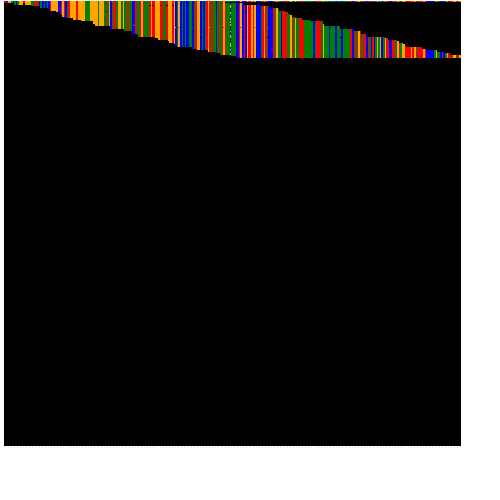

In [86]:
f = '/projects/da_workspace/szspace/data/giab/image2/giab.4.171134361.png'
crop_custom_img(f)
Image.open('/projects/da_workspace/szspace/data/giab/image2/proc/giab.4.171134361.png')



# how to take a screen shot for model?

In [11]:
from fastai.vision import *

torch.Size([3, 200, 800])

(200, 800, 3)

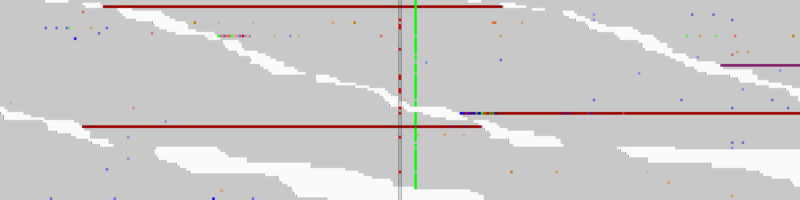

In [28]:
f = '/projects/da_workspace/szspace/data/snapshots/positives/chr11_47,609,711_47,610,011.png'
im = open_image(f)
im.shape
np.array(Image.open(f)).shape
im

In [29]:
def crop_img(inf):
    im = Image.open(inf)
    left, upper = 174, 294
    w, h = 1726, 400
    box = (left, upper, left+w, upper+h)
    cim = im.crop(box)
    splt = inf.split('/')
    of = '/home/szong/test.png'
#     of = '/'.join(splt[:-1] + ['proc'] + [splt[-1]])
#     cim.save(of)
    return cim

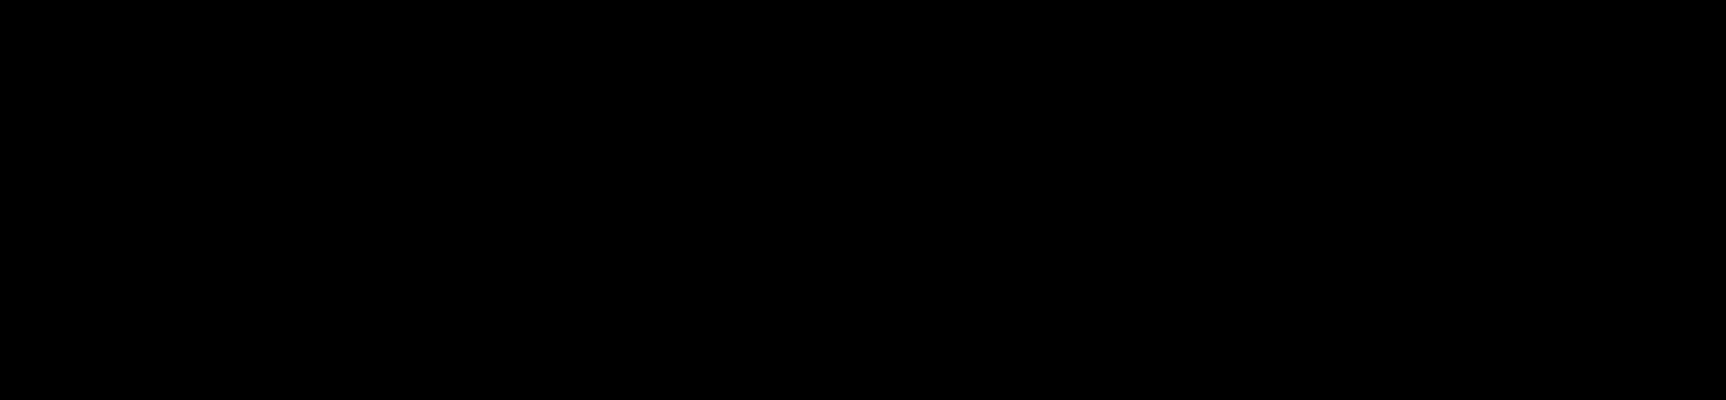

(400, 1726, 3)

In [31]:
cim = crop_img(f)
cim
np.array(cim).shape

#### image by manually taking a screenshot has 4 channels, weird. however, if i use igv batch command, it has 3 channels. when resizing the images, i can not use NEAREST resampling method because this results in loosing information. it seems any other method will keep the centre line. I use BILINEAR INTERPLOATION for now

In [309]:
np.array(cim).shape

(400, 1726, 4)

In [255]:
cim.resize??

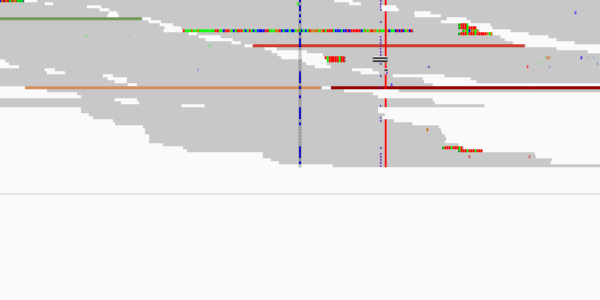

In [298]:
pim = cim.resize((600, 300), resample=PIL.Image.BILINEAR)
pim

### test a screen shot manually taken and cropped

(1200, 1920, 4)

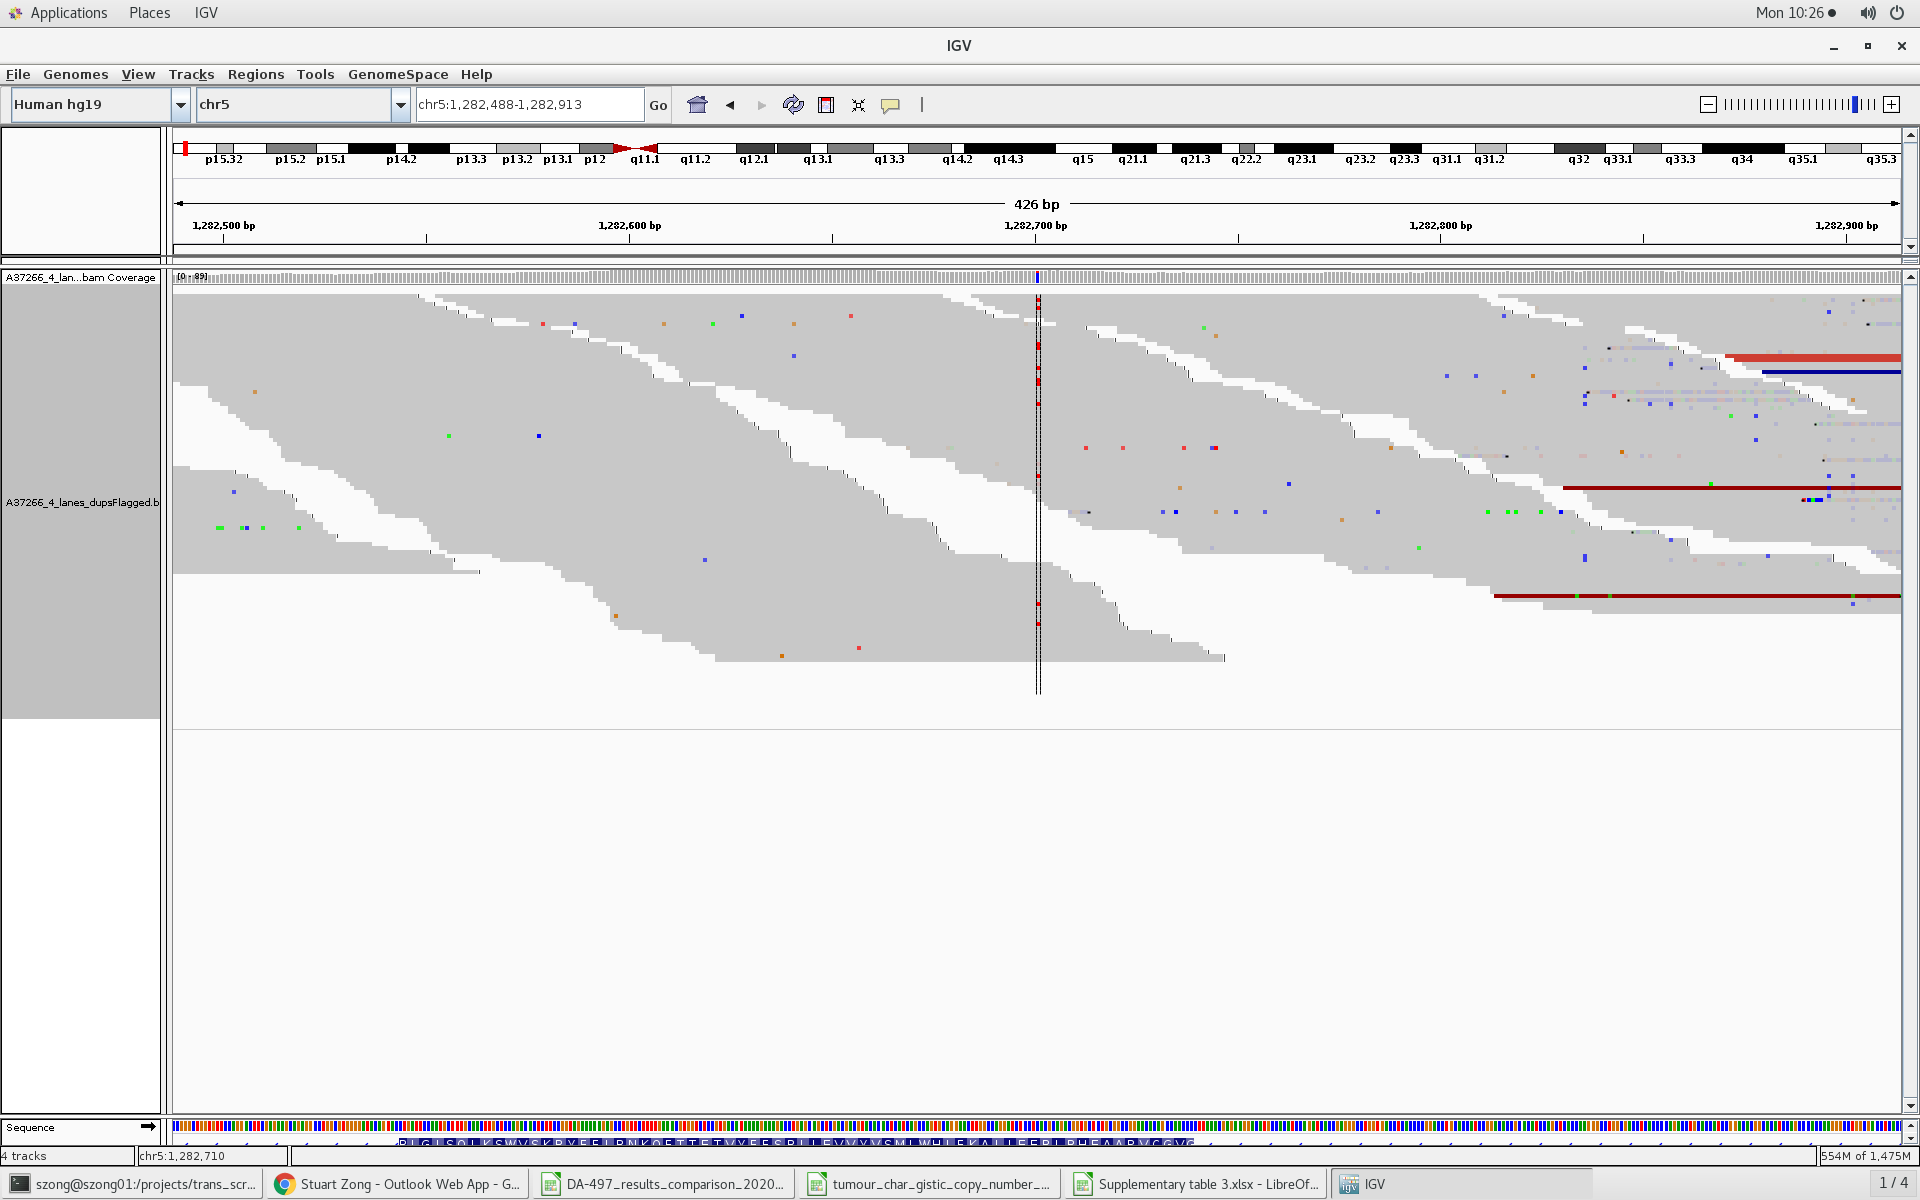

In [8]:
aimg = '/home/szong/htmcp_test.png'
aimg = '/home/szong/htmcp_test_original.png'
img = Image.open(aimg)
np.array(img).shape
img